# Reinforcement Learning 

Notice that in supervised learning, the focus is on working on past information and then deriving insights from it. In other words, we’re much focused on the past than on the present and future. 
But for data science and machine learning to become truly useful, the algorithms and systems should work on real-time situations. For instance, we require systems that learn real-time and adjusts accordingly to maximize the rewards. 

## What is Reinforcement Learning? 


In a nutshell, RL is about reinforcing the correct or desired behaviors as time passes. A reward for every correct behavior and a punishment otherwise. Recently RL was implemented to beat world champions at the game of Go and successfully play various Atari video games (although Reinforcement Learning there was more sophisticated and incorporated deep learning). As the system learns from reinforcement, it was able to achieve a goal or maximize the reward. 

One simple example is in the optimization of click-through rates (CTR) of online ads. Perhaps you have 10 ads that essentially say the same thing (maybe the words and designs are slightly different from one another). At first you want to know which ad performs best and yields the highest CTR. After all, more clicks could mean more prospects and customers for your business. 

But if you want to maximize the CTR, why not perform the adjustments as the ads are being run? In other words, don’t wait for your entire ad budget to run out before knowing which one performed best. Instead, find out which ads are performing best while they’re being run. Make adjustments early on so later only the highest-performing ads will be shown to the prospects. 

It’s very similar to a famous problem in probability theory about the multi-armed bandit problem. Let’s say you have a limited resource (e.g. advertising budget) and some choices (10 ad variants). How will you allocate your resource among those choices so you can maximize your gain (e.g. optimal CTR)? 

First, you have to “explore” and try the ads one by one. Of course, if you’re seeing that Ad 1 performs unusually well, you’ll “exploit” it and run it for the rest of the campaign. You don’t need to waste your money on underperforming ads. Stick to the winner and continuously exploit its performance. 

There’s one catch though. Early on Ad 1 might be performing well so we’re tempted to use it again and again. But what if Ad 2 catches up and if we let things unfold Ad 2 will produce higher gains? We’ll never know because the performance of Ad 1 was already exploited. 

There will always be tradeoffs in many data analysis and machine learning projects. That’s why it’s always recommended to set performance targets beforehand instead of wondering about the what-ifs later. Even in the most sophisticated techniques and algorithms, tradeoffs and constraints are always there. 

## Comparison with Supervised & Unsupervised Learning 

Notice that the definition of Reinforcement Learning doesn’t exactly fit under either Supervised or Unsupervised Learning. Remember that Supervised Learning is about learning through supervision and training. On the other hand, Unsupervised Learning is actually revealing or discovering insights from unstructured data (no supervision, no labels). 

One key difference compared to RL is in maximizing the set reward, learning from user interaction, and the ability to update itself in real time. Remember that RL is first about exploring and exploiting. In contrast, both Supervised and Unsupervised Learning can be more about passively learning from historical data (not real time). 

There’s a fine boundary among the 3 because all of them are still concerned about optimization in one way or another. Whichever is the case, all 3 have useful applications in both scientific and business settings. 

## Applying Reinforcement Learning 


RL is particularly useful in many business scenarios such as optimizing click-through rates. How can we maximize the number of clicks for a headline? Take note that news stories often have limited lifespans in terms of their relevance and popularity. Given that limited resource (time), how can we immediately show the best performing headline? 

This is also the case in maximising the CTR of online ads. We have a limited ad budget and we want to get the most out of it. Let’s explore an example (using the data from Ads_CTR_Optimisation.csv) to better illustrate the idea: 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') 
dataset.head(10) 

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In each round, the ads are displayed and it’s indicated which one/ones were clicked (0 if not clicked, 1 if clicked). As discussed earlier, the goal is to explore first, pick the winner and then exploit it. 

One popular way to achieve this is by Thompson Sampling. Simply, it addresses the exploration-exploitation dilemma (trying to achieve a balance) by sampling or trying the promising actions while ignoring or discarding actions that are likely to underperform. The algorithm works on probabilities and this can be expressed in code through the following: 

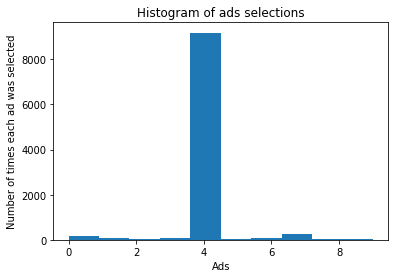

In [4]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward 
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show() 

Notice that the implementation of Thompson sampling can be very complex. It’s an interesting algorithm which is widely popular in online ad optimization, news article recommendation, product assortment and other business applications. 

There are other interesting algorithms and heuristics such as Upper Confidence Bound. The goal is to earn while learning. Instead of later analysis, our algorithm can perform and adjust in real time. We’re hoping to maximize the reward by trying to balance the tradeoff between exploration and exploitation (maximize immediate performance or “learn more” to improve future performance). It’s an interesting topic itself and if you want to dig deeper, you can read the following Thompson Sampling tutorial from Stanford: 
https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf 